<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Проверка простых статистических гипотез. Оценка действительных значений вероятностей ошибок 1 и 2 рода

Цели и задачи л/р: выполнить массовое статистическое моделирование, направленное на изучение проверки гипотез с контролем вероятностей ошибок первого и второго рода (на примере проверки гипотез о математическом ожидании, дисперсии, о вероятностной мере интерквантильного промежутка).

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm

1. Сгенерировать N = 103 выборок размером n (для всех значений n = 10, 50, 100, 150, 200, 500) из следующих распределений:
1. нормального с нулевым математическим ожиданием и единичной дисперсией
2. равномерного на интервале [−√3, √3],
3. экспоненциального с параметром распределения  = 1, из всех значений которого вычтена единица.

In [44]:
sample_sizes = [10, 50, 100, 150, 200, 500]  # Размерность выборок
N = 10 ** 3  # Число выборок
alpha = 0.05 # Уровень значимости || вероятность зря отвергнуть H0 при ее верности
z_critical = norm.ppf(1 - alpha / 2) # z-статистика
a = 0.06
print(f'Z-critical: {z_critical}')

Z-critical: 1.959963984540054


In [45]:
"""НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ"""
"""РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ"""
"""ЭКСПОНЕНТА"""

samples = {
    "normal_distribution": {
        values: [] for values in sample_sizes
    },
    "uniform_distribution": {
        values: [] for values in sample_sizes
    },
    "exponential_distribution": {
        values: [] for values in sample_sizes
    }
}

for value in sample_sizes:
    samples["normal_distribution"][value] = [np.random.normal(0, 1, value) for _ in range(N)]
    samples["uniform_distribution"][value] = [np.random.uniform(-np.sqrt(3), np.sqrt(3), value) for _ in range(N)]
    samples["exponential_distribution"][value] = [np.random.exponential(1, value) - 1 for _ in range(N)]

2. Для каждой выборки проверить сложную гипотезу о том, что математическое ожидание меньше а = 5. Величину критического значения назначьте, исходя из заданного значения уровня значимости  = 0,05. Считать дисперсию генеральной совокупности известной и равной единице. Исследовать, совпадает ли назначенное значение уровня значимости ( = 0,05) с реально достигаемым *. Для этого для каждого значения размера выборки n подсчитать, в каком количестве из испытанных выборок было принято решение об отклонении нулевой гипотезы. Построить график зависимости * от размера выборки (n). Наложить на каждое значение * границы доверительного интервала для данной вероятности, чтобы понять, попадает ли точное значение  в их пределы или нет.


In [49]:
def mean_shift(samples_dict, dist_type, shift_values, sigma=1):
    results = {shift: [] for shift in shift_values}

    for shift in shift_values:
        for n, sample_set in samples_dict[dist_type].items():
            rejections = 0
            for sample in sample_set:
                sample_mean = np.mean(sample + shift)
                z_score = (sample_mean - a) / (sigma / np.sqrt(n))
                if z_score > norm.ppf(1 - alpha):
                    rejections += 1
            results[shift].append(rejections / N)

    return results

In [50]:
def plot_mean_shift(dist_type, shift_values):
    results = mean_shift(samples, dist_type, shift_values)

    plt.figure(figsize=(10, 6))
    for shift, alpha_stars in results.items():
        plt.plot(sample_sizes, alpha_stars, label=f"Shift = {shift:.1f}")
    plt.axhline(alpha, color="red", linestyle="--", label="True alpha")
    plt.title(f"alpha* от n для {dist_type}")
    plt.xlabel("n")
    plt.ylabel("alpha*")
    plt.legend()
    plt.grid()
    plt.show()

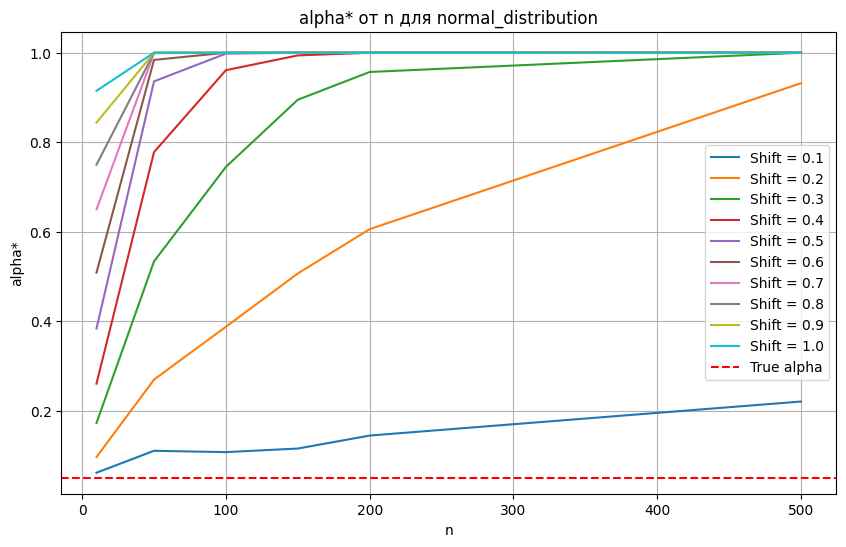

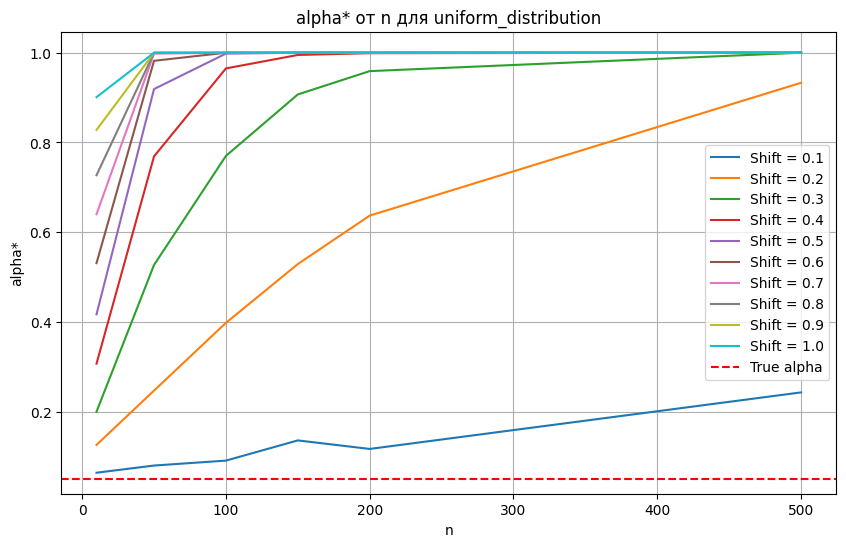

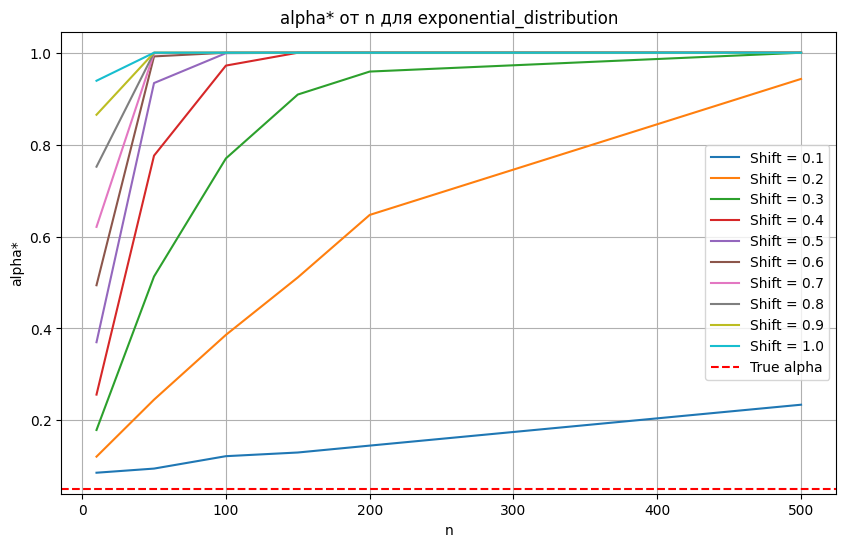

In [51]:
shift_values = np.arange(0.1, 1.1, 0.1)
for dist in ["normal_distribution", "uniform_distribution", "exponential_distribution"]:
      plot_mean_shift(dist, shift_values)

4. Проделать пункты 2-3 для проверки гипотезы о том, что дисперсия соответствующей случайной величины меньше 3.

In [15]:
samples = {
    "normal": {n: [] for n in sample_sizes},
    "uniform": {n: [] for n in sample_sizes},
    "exponential": {n: [] for n in sample_sizes}
}
for n in sample_sizes:
    samples["normal"][n] = [np.random.normal(0, 1, n) for _ in range(N)]
    samples["uniform"][n] = [np.random.uniform(-np.sqrt(3), np.sqrt(3), n) for _ in range(N)]
    samples["exponential"][n] = [np.random.exponential(1, n) - 1 for _ in range(N)]

In [21]:
def test_variance(samples_dict, dist_type, threshold=3):
    results = []
    for n, sample_set in samples_dict[dist_type].items():
        rejections = 0
        for sample in sample_set:
            sample_var = np.var(sample, ddof=1)
            chi2_score = (n - 1) * sample_var / threshold
            if chi2_score > scipy.stats.chi2.ppf(1 - alpha, df=n - 1):
                rejections += 1
        alpha_star = rejections / N
        results.append(alpha_star)
    return results

In [22]:
def plot_variance_test(dist_type):
    alpha_stars = test_variance(samples, dist_type)
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, alpha_stars, label="Вычисленное alpha*")
    plt.axhline(alpha, color="red", linestyle="--", label="True alpha")
    plt.title(f"alpha* для {dist_type}")
    plt.xlabel("n")
    plt.ylabel("alpha*")
    plt.legend()
    plt.grid()
    plt.show()

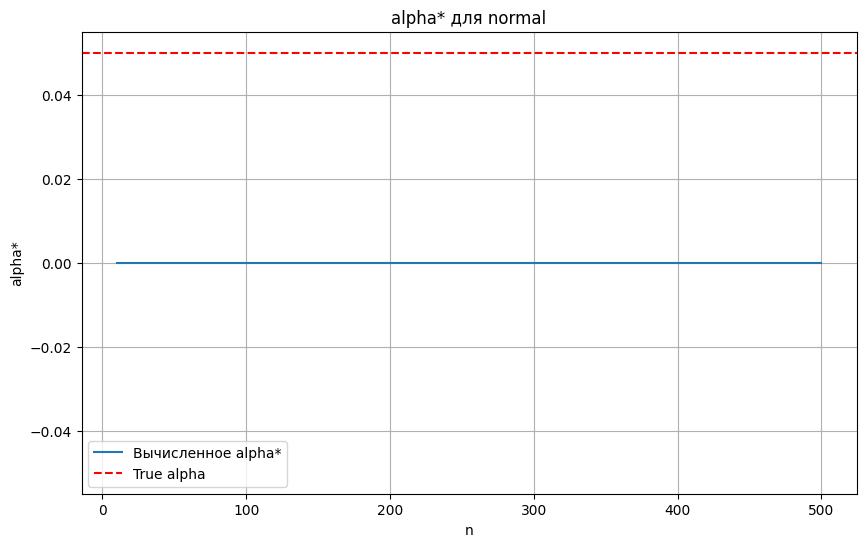

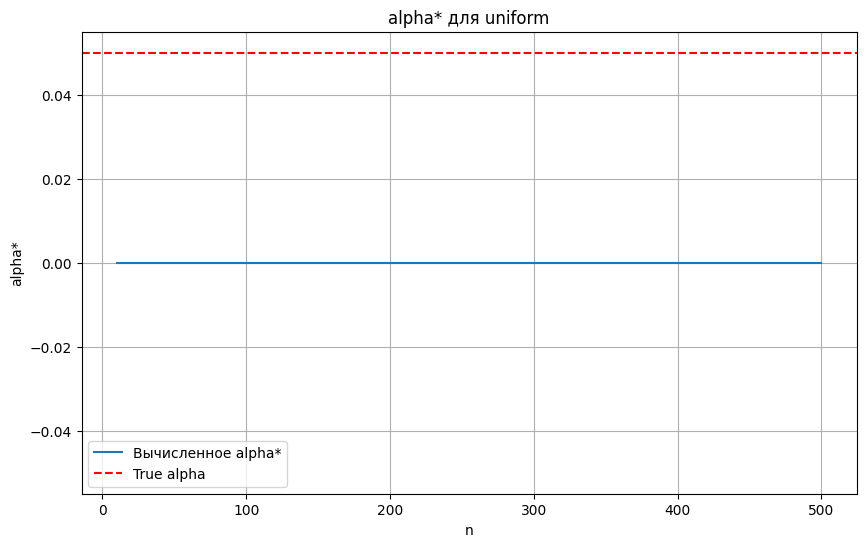

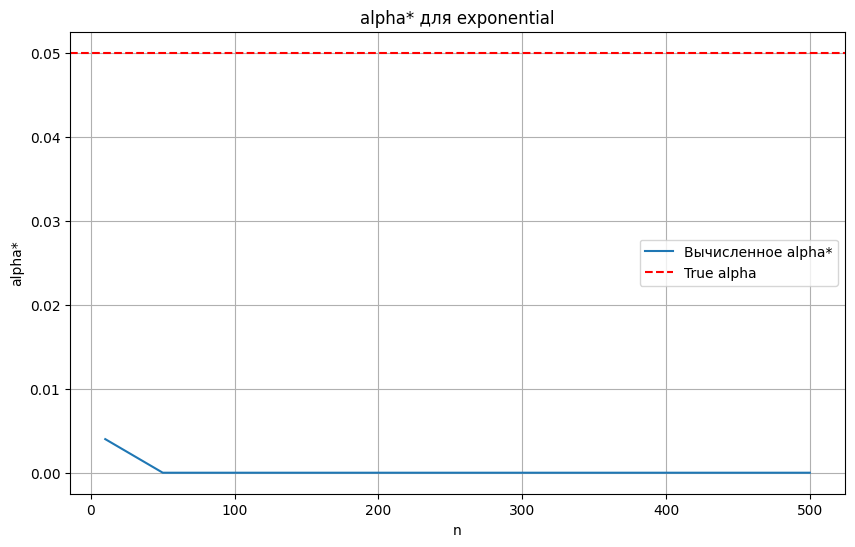

In [23]:
for dist in ["normal", "uniform", "exponential"]:
    plot_variance_test(dist)

5. Проделать пункты 2-3 для проверки гипотезы о том, что 95% интерквантильный промежуток целиком укладывается в интервал [–5, +5].

In [24]:
samples = {
    "normal": {n: [] for n in sample_sizes},
    "uniform": {n: [] for n in sample_sizes},
    "exponential": {n: [] for n in sample_sizes}
}
for n in sample_sizes:
    samples["normal"][n] = [np.random.normal(0, 1, n) for _ in range(N)]
    samples["uniform"][n] = [np.random.uniform(-np.sqrt(3), np.sqrt(3), n) for _ in range(N)]
    samples["exponential"][n] = [np.random.exponential(1, n) - 1 for _ in range(N)]

In [25]:
def test_interquantile(samples_dict, dist_type, lower=-5, upper=5):
    results = []
    for n, sample_set in samples_dict[dist_type].items():
        rejections = 0
        for sample in sample_set:
            q05, q95 = np.percentile(sample, [2.5, 97.5])
            if not (lower <= q05 and q95 <= upper):
                rejections += 1
        alpha_star = rejections / N
        results.append(alpha_star)
    return results

In [26]:
def plot_interquantile_test(dist_type):
    alpha_stars = test_interquantile(samples, dist_type)
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, alpha_stars, label="Вычисленное alpha*")
    plt.axhline(alpha, color="red", linestyle="--", label="True alpha")
    plt.title(f"Интерквантильный промежуток для {dist_type}")
    plt.xlabel("n")
    plt.ylabel("")
    plt.legend()
    plt.grid()
    plt.show()

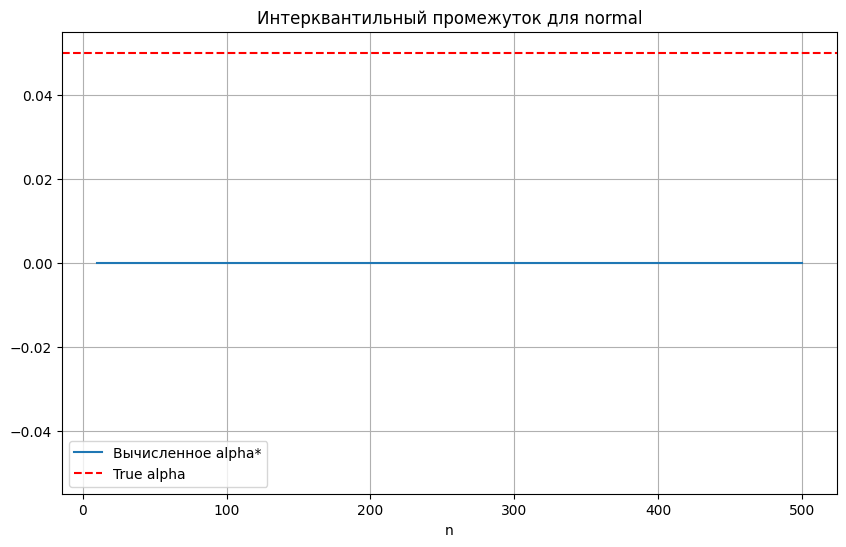

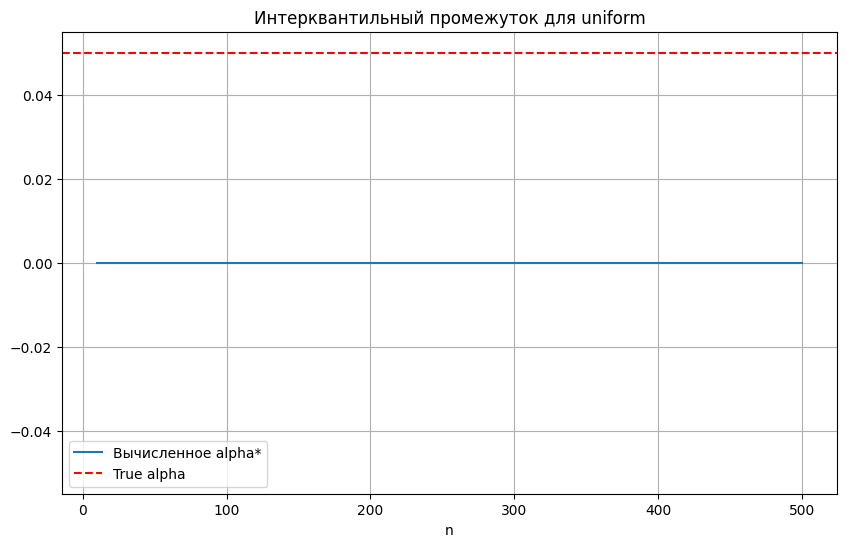

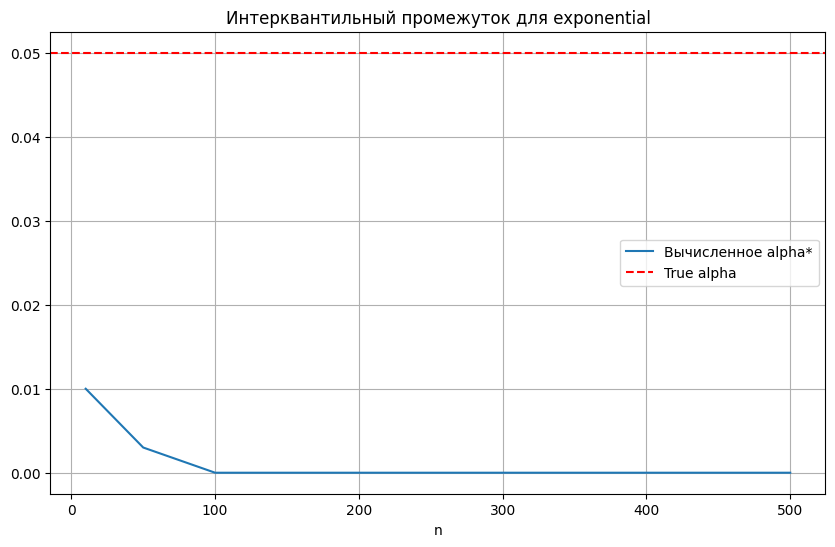

In [27]:
for dist in ["normal", "uniform", "exponential"]:
    plot_interquantile_test(dist)